# WNS Analytics Hackathon - EDA

In [1]:
import os
os.chdir('E:/Anupam/HomeDocs/DataScience/Hackathon/WNS_Analytics')
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
import featuretools as ft

In [3]:
# Read the dataset
train_dataset = pd.read_csv ('Dataset/train.csv')
test_dataset = pd.read_csv ('Dataset/test.csv')
train_dataset.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


# Exploratory Data Analysis

In [4]:
train_dataset.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [5]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


#### Inference:
1. There are NaN values in Education and previous_year_rating
2. All numeric columns have been read in correctdata type
3. The standard deviation of length_of_service high and the values have +ve skewness

### Fill the NaN values
The logic to fill NaN value is as below:
1. Education: As this is a categorical variable, I have imputed value 'Not Known' for NaN
2. previous_year_rating: Fill the mean value of the category based on column KPIs_met >80% value.

In [6]:
# Drop the NaN values from Education or Previous Year Rating
train_dataset.education.fillna('Not Known', inplace = True)
test_dataset.education.fillna('Not Known', inplace = True)

# Fill the previous_year_rating field
train_dataset["previous_year_rating"].fillna(round(train_dataset.groupby("KPIs_met >80%")["previous_year_rating"].\
                                                   transform("mean"), 0), inplace=True)
test_dataset["previous_year_rating"].fillna(round(test_dataset.groupby("KPIs_met >80%")["previous_year_rating"].\
                                                   transform("mean"), 0), inplace=True)

In [7]:
train_dataset.skew(), train_dataset.kurt()

(employee_id            -0.003128
 no_of_trainings         3.445434
 age                     1.007432
 previous_year_rating   -0.317811
 length_of_service       1.738061
 KPIs_met >80%           0.619909
 awards_won?             6.338914
 avg_training_score      0.451908
 is_promoted             2.972339
 dtype: float64, employee_id             -1.196479
 no_of_trainings         18.740082
 age                      0.792353
 previous_year_rating    -0.596480
 length_of_service        4.414031
 KPIs_met >80%           -1.615772
 awards_won?             38.183220
 avg_training_score      -1.049649
 is_promoted              6.835049
 dtype: float64)

### Exploring No of promotions of each category

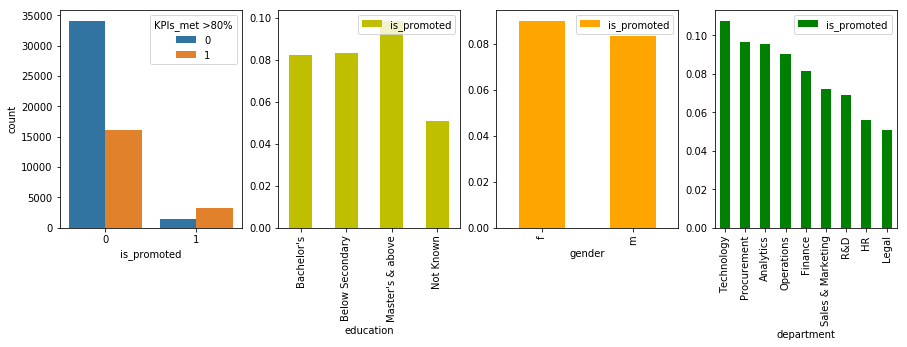

In [8]:
fig, ((ax1, ax2, ax3, ax4)) = plt.subplots(nrows=1, ncols=4, figsize=(15,4))
sns.countplot(x="is_promoted", data = train_dataset, hue = 'KPIs_met >80%', ax=ax1)
train_dataset[['is_promoted', 'education']].groupby('education').mean().plot.bar(color='y', ax=ax2)
train_dataset[['is_promoted', 'gender']].groupby('gender').mean().plot.bar(color='orange', ax=ax3)
temp= train_dataset[['is_promoted', 'department']].groupby('department').mean().sort_values('is_promoted', ascending = False)\
                .plot.bar(color='g', ax=ax4)

#### Inference
1. Employes who met 80% KPI have much higher chances to getting promoted
2. Employees having Education 'Masters & Avove' have 10% chances of promotion and it is higher than other 2 categories of education by 2%
3. Female employees have slightly better chance of getting promoted than the male employees
4. Employees in Technology department have highest chances(10.5%) of promotion followed by Procurement, Analytics and Operations department. HR and Legal seems to have lowest promotion rate

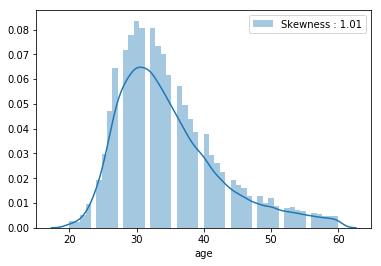

In [9]:
train_temp = train_dataset[['age']]
g = sns.distplot(train_temp["age"],label="Skewness : %0.2f"%(train_temp["age"].skew()))
g.legend(loc = 'best')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C8D2BA8>,
      dtype=object)

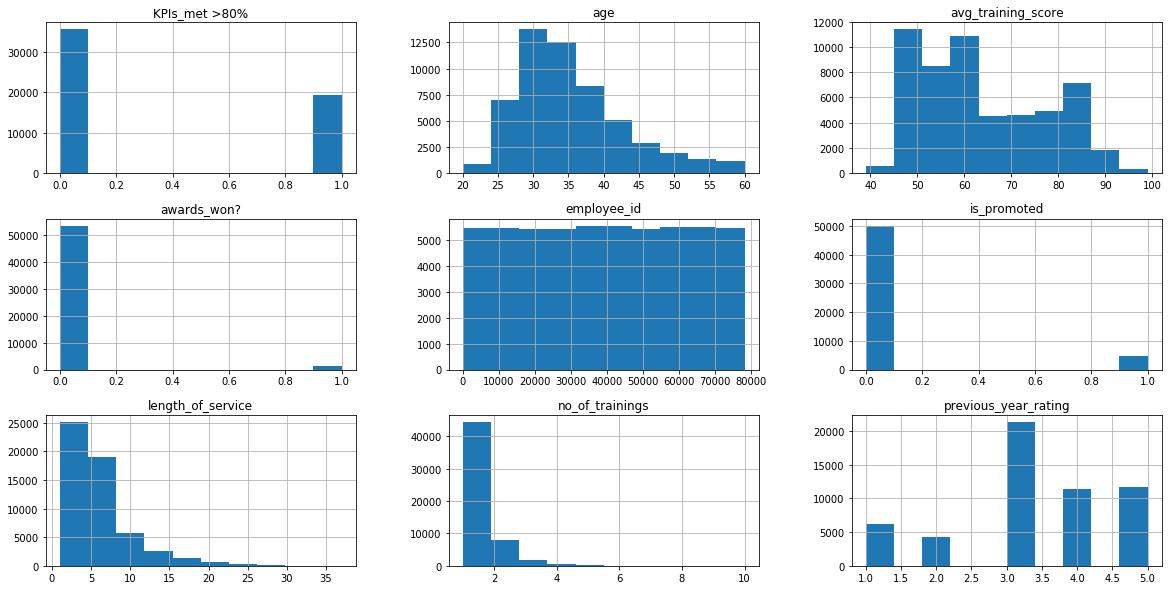

In [10]:
train_dataset[train_dataset.dtypes[(train_dataset.dtypes=="float64")|(train_dataset.dtypes=="int64")]
                        .index.values].hist(figsize=[20,10])

#### Inference
1. Age, length_of_service, no_of_trainings seems to be +vely skewed
2. previous_year_rating have considerable records in 3, 4, 4.5 and 5 range

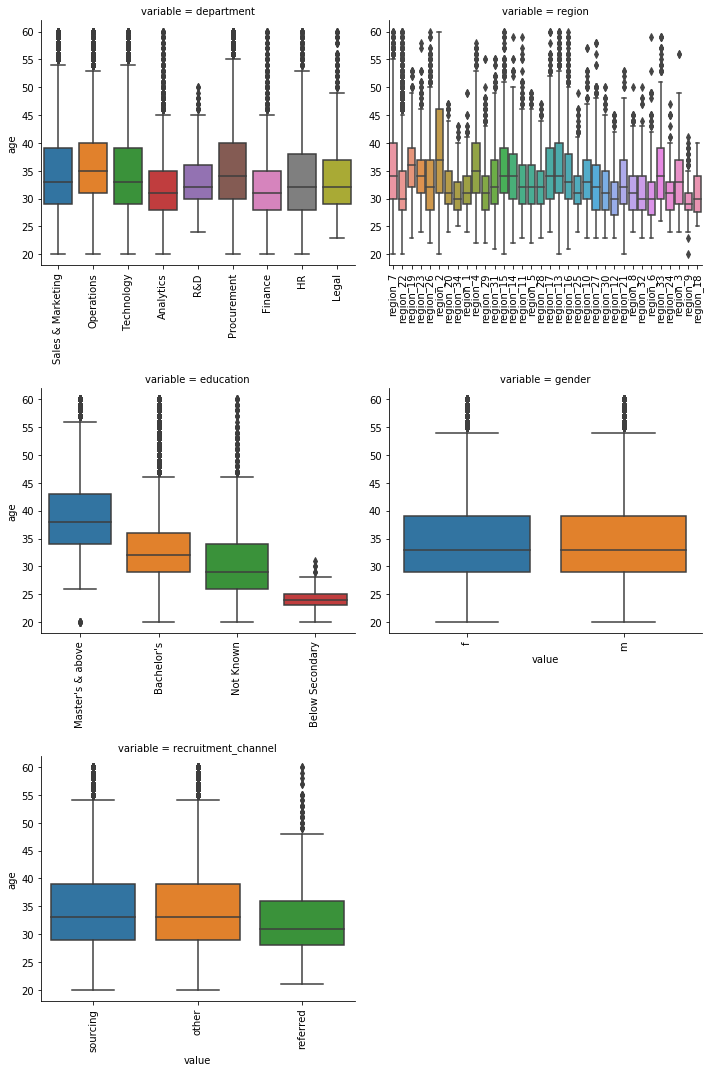

In [11]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)

categorical_features = train_dataset.select_dtypes(include=[np.object])
f = pd.melt(train_dataset, id_vars=['age'], value_vars=categorical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "age")

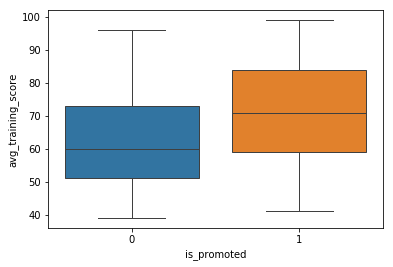

In [12]:
sns.boxplot(x='is_promoted', y='avg_training_score', data=train_dataset, linewidth=1)

#### Inference
Employees who underwent training have significantly higher chances of promotion than those who did not undergo any training

### Draw a relationship between previes year rating and KPI>80% 

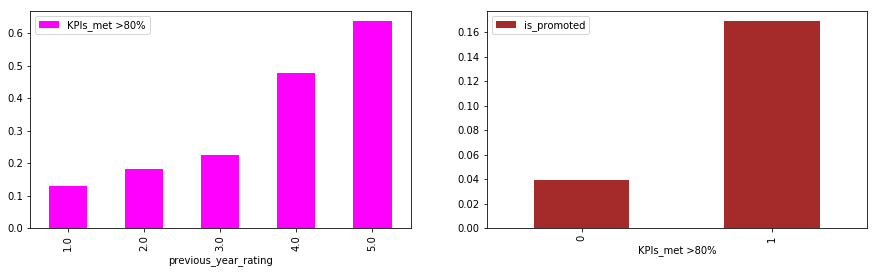

In [13]:
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(15,4))
train_dataset[['previous_year_rating', 'KPIs_met >80%']].groupby('previous_year_rating').mean().plot.bar(color = 'magenta', ax = ax1)
train_dataset[['KPIs_met >80%', 'is_promoted']].groupby('KPIs_met >80%').mean().plot.bar(color = 'brown', ax = ax2)

#### Inference
1. There is 63% chance that an employee having previous_year_rating = 5 will meet KPI >80% target. It drops to 40%, 28%, 20% and 13% for employees having previous_year_rating of 4, 3, 2, 1 respectively
2. There is approx 16.5% chance that an employee achieving >80% KPI will get promoted. The % drops to 4% for employees not achieving 80% KPI. It implies, the organization rewards high performing employees

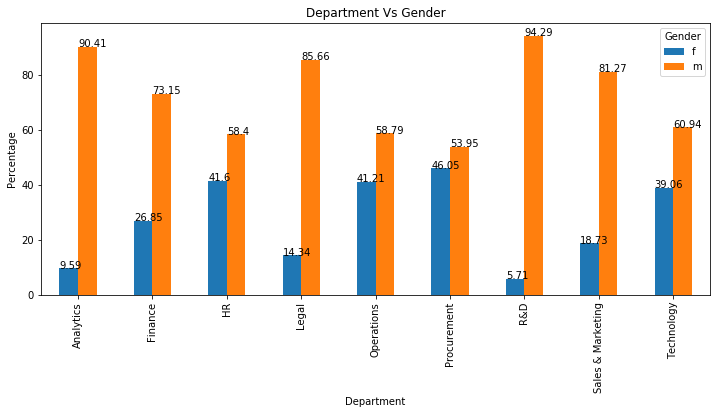

In [14]:
departmentVsGender = round(pd.crosstab(train_dataset['department'], train_dataset['gender'], rownames=['Department'], \
                                      colnames=['Gender'], normalize='index') * 100, 2)
ax = departmentVsGender.plot.bar(figsize=(12,5))
plt.title('Department Vs Gender')
plt.ylabel("Percentage")
#for getting the values on each bar
for i in ax.patches:
    ax.annotate(i.get_height(), (i.get_x(), i.get_height()))


#### Inference
1. R&D department has highest % of male employees (94.29%) followed by Analytics(90.78%)
3. Procurement, HR and Operations have relatively high % offemale employees 46.06%, 41.83% and 41.53% respectively

## Relation between No of training program and promotion

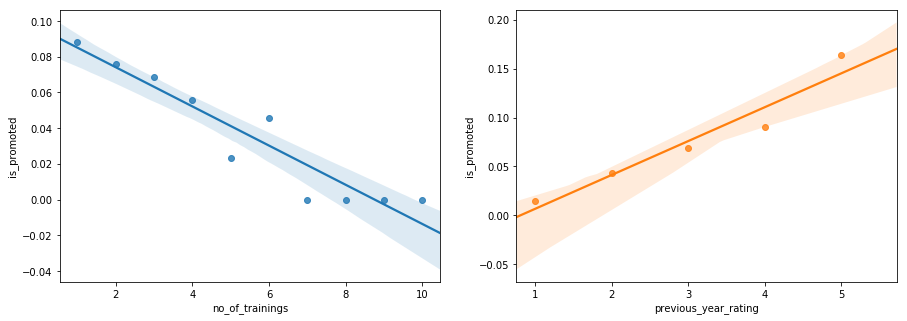

In [15]:
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
trainingVsIsPromoted = train_dataset[['no_of_trainings', 'is_promoted']].groupby('no_of_trainings').mean().reset_index()
previousRatingVsIsPromoted = train_dataset[['previous_year_rating', 'is_promoted']].groupby('previous_year_rating').mean().\
reset_index()
sns.regplot(x=trainingVsIsPromoted.no_of_trainings,y = trainingVsIsPromoted.is_promoted, scatter= True, fit_reg=True, ax=ax1)
sns.regplot(x=previousRatingVsIsPromoted.previous_year_rating,y = previousRatingVsIsPromoted.is_promoted, \
            scatter= True, fit_reg=True, ax=ax2)

#### Inference
1. As employees take up more trainings, their chances of getting promoted reduces
2. Employees who have undergone 1 training, has highest chance of getting promoted(approx 9%)

### Feature Engineering

In [16]:
train_dataset['total_training_score'] = train_dataset.no_of_trainings * train_dataset.avg_training_score
test_dataset['total_training_score'] = test_dataset.no_of_trainings * test_dataset.avg_training_score

# No of trainings per year of service
train_dataset['no_of_trainings_per_year_of_service'] = train_dataset.no_of_trainings / train_dataset.length_of_service
test_dataset['no_of_trainings_per_year_of_service'] = test_dataset.no_of_trainings / test_dataset.length_of_service

In [17]:
total_training = train_dataset[['total_training_score', 'no_of_trainings', 'is_promoted']]
# Lets do binning of total score and analyse chances of promotion in each bin
total_training_score_bin = np.arange(0, 750, 50)
bin_labels = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300', '301-350', '351-400', '401-450', \
              '451-500', '501-550', '551-600', '601-650', '651-700']
total_training['total_training_score_bin'] = pd.cut(total_training['total_training_score'], bins = total_training_score_bin,\
                                                    labels = bin_labels, right = True)
total_training = total_training.groupby(['total_training_score_bin']).mean().reset_index().dropna()

#ax1 = total_training.plot.bar(x = 'total_training_score_bin', y = 'is_promoted', linewidth = 5)
total_training.head()


,total_training_score_bin,total_training_score,no_of_trainings,is_promoted
0,0-50,47.945525,1.000000,0.043621
1,51-100,68.531365,1.045634,0.097196
2,101-150,123.945020,2.096696,0.061008
3,151-200,167.883969,2.246718,0.105344
4,201-250,225.948087,3.241803,0.068306


Series([], dtype: float64)

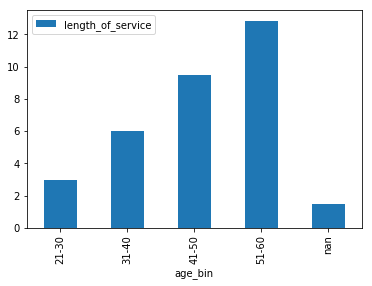

In [18]:
# Lets do binning of age of employees and analyse legth ofservice in each bin
age_bin = [20, 30, 40, 50, 60]
bin_labels = ['21-30', '31-40', '41-50', '51-60']
train_dataset['age_bin'] = pd.cut(train_dataset['age'], bins = age_bin, labels = bin_labels, right = True).astype(str)
# impute the average length of service for each bin
avg_length_of_service = round(train_dataset[['length_of_service', 'age_bin']].groupby('age_bin').mean(), 2)
avg_length_of_service.plot.bar()
avg_length_of_service = avg_length_of_service.reset_index()

# Repeat the process for testdata
test_dataset['age_bin'] = pd.cut(test_dataset['age'], bins = age_bin, labels = bin_labels, right = True).astype(str)
train_dataset[train_dataset.columns[train_dataset.isnull().any()]].isnull().sum()

In [19]:
train_dataset['Age_at_joining'] = train_dataset.age - train_dataset.length_of_service
test_dataset['Age_at_joining'] = test_dataset.age - test_dataset.length_of_service

#### Inference
1. Employees in the age group of 51-60 are loyal to company and they stay within the organization of 12.5 years on an average
2. Employees in age group of 21-30 are more like to stay only for 3 years

In [20]:
# Imputing category average promotion of department, region, education, gender and channel into train and test dataset

train_dataset['department_average'] = train_dataset.groupby('department')['is_promoted'].transform(lambda x: x.mean())
train_dataset['region_average'] = train_dataset.groupby('region')['is_promoted'].transform(lambda x: x.mean())
train_dataset['education_average'] = train_dataset.groupby('education')['is_promoted'].transform(lambda x: x.mean())
train_dataset['gender_average'] = train_dataset.groupby('gender')['is_promoted'].transform(lambda x: x.mean())
train_dataset['channel_average'] = train_dataset.groupby('recruitment_channel')['is_promoted'].transform(lambda x: x.mean())

test_dataset['department_average'] = train_dataset.groupby('department')['is_promoted'].transform(lambda x: x.mean())
test_dataset['region_average'] = train_dataset.groupby('region')['is_promoted'].transform(lambda x: x.mean())
test_dataset['education_average'] = train_dataset.groupby('education')['is_promoted'].transform(lambda x: x.mean())
test_dataset['gender_average'] = train_dataset.groupby('gender')['is_promoted'].transform(lambda x: x.mean())
test_dataset['channel_average'] = train_dataset.groupby('recruitment_channel')['is_promoted'].transform(lambda x: x.mean())

In [21]:
train_dataset.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,...,is_promoted,total_training_score,no_of_trainings_per_year_of_service,age_bin,Age_at_joining,department_average,region_average,education_average,gender_average,channel_average
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,...,0,49,0.125000,31-40,27,0.072031,0.106546,0.098559,0.089934,0.085013
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,...,0,60,0.250000,21-30,26,0.090148,0.114188,0.082031,0.083151,0.083952
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,...,0,50,0.142857,31-40,27,0.072031,0.060641,0.082031,0.083151,0.085013
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,...,0,100,0.200000,31-40,29,0.072031,0.116596,0.082031,0.083151,0.083952
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,...,0,73,0.500000,41-50,43,0.107593,0.063274,0.082031,0.083151,0.083952


### Lets review the correlation matrix and Pair Plot to understand dependency of input variables

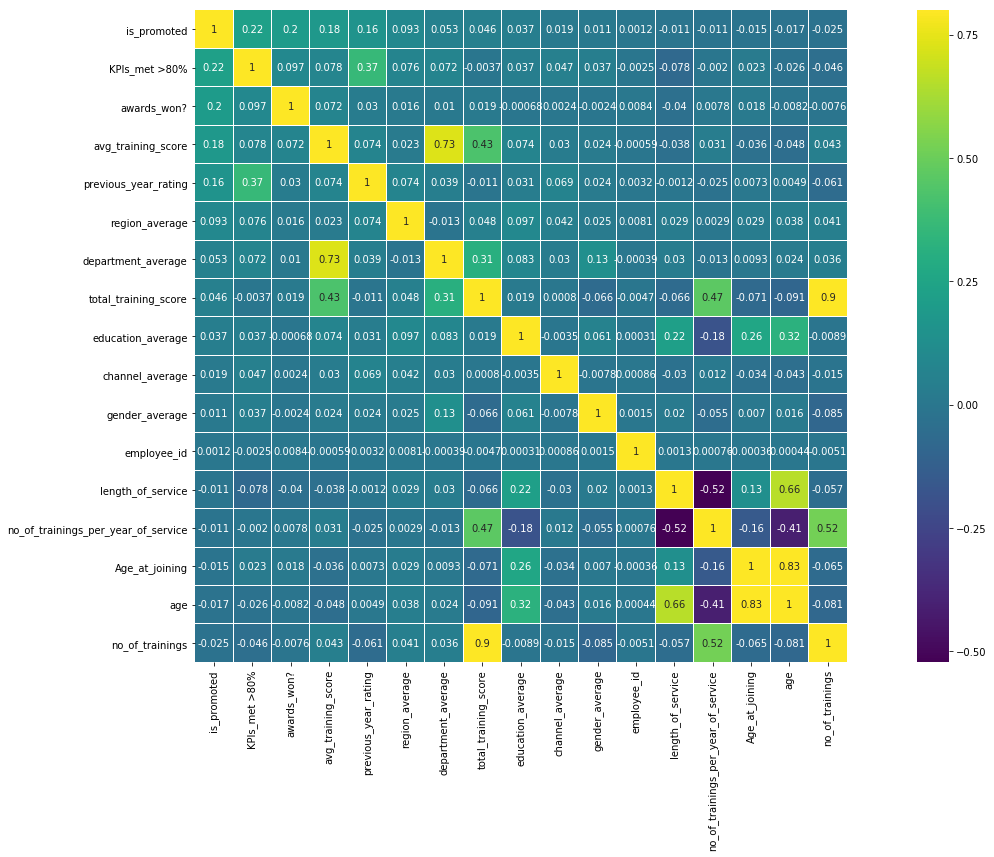

In [25]:
k= train_dataset.select_dtypes(include=[np.number]).columns.size
correlation = train_dataset.select_dtypes(include=[np.number]).corr()
#Build correlation matrix for target variable
cols = correlation.nlargest(k,'is_promoted')['is_promoted'].index
cm = np.corrcoef(train_dataset[cols].values.T)
f , ax = plt.subplots(figsize = (25,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':10},yticklabels = cols.values)


#### Inference
1. avg_training_score is highly correlated with department_average, hence, we shall take only 1 of them. Since, avg_training_score has higher correlation with target variable, we keep it and drop department_average
2. Total_training_score and no_of_training are again twins and highly correlated. Total_training_score has higher correlation with target variable. Hence, we shall keep this and drop no_of_training

In [26]:
train_dataset.drop(['department_average','no_of_trainings'], axis = 1, inplace = True)

### Pair Plot
We now draw the pair plot for the variable which have higher correlation with output variable. Aso, we drop the variable which have high correlation coefficient mutually

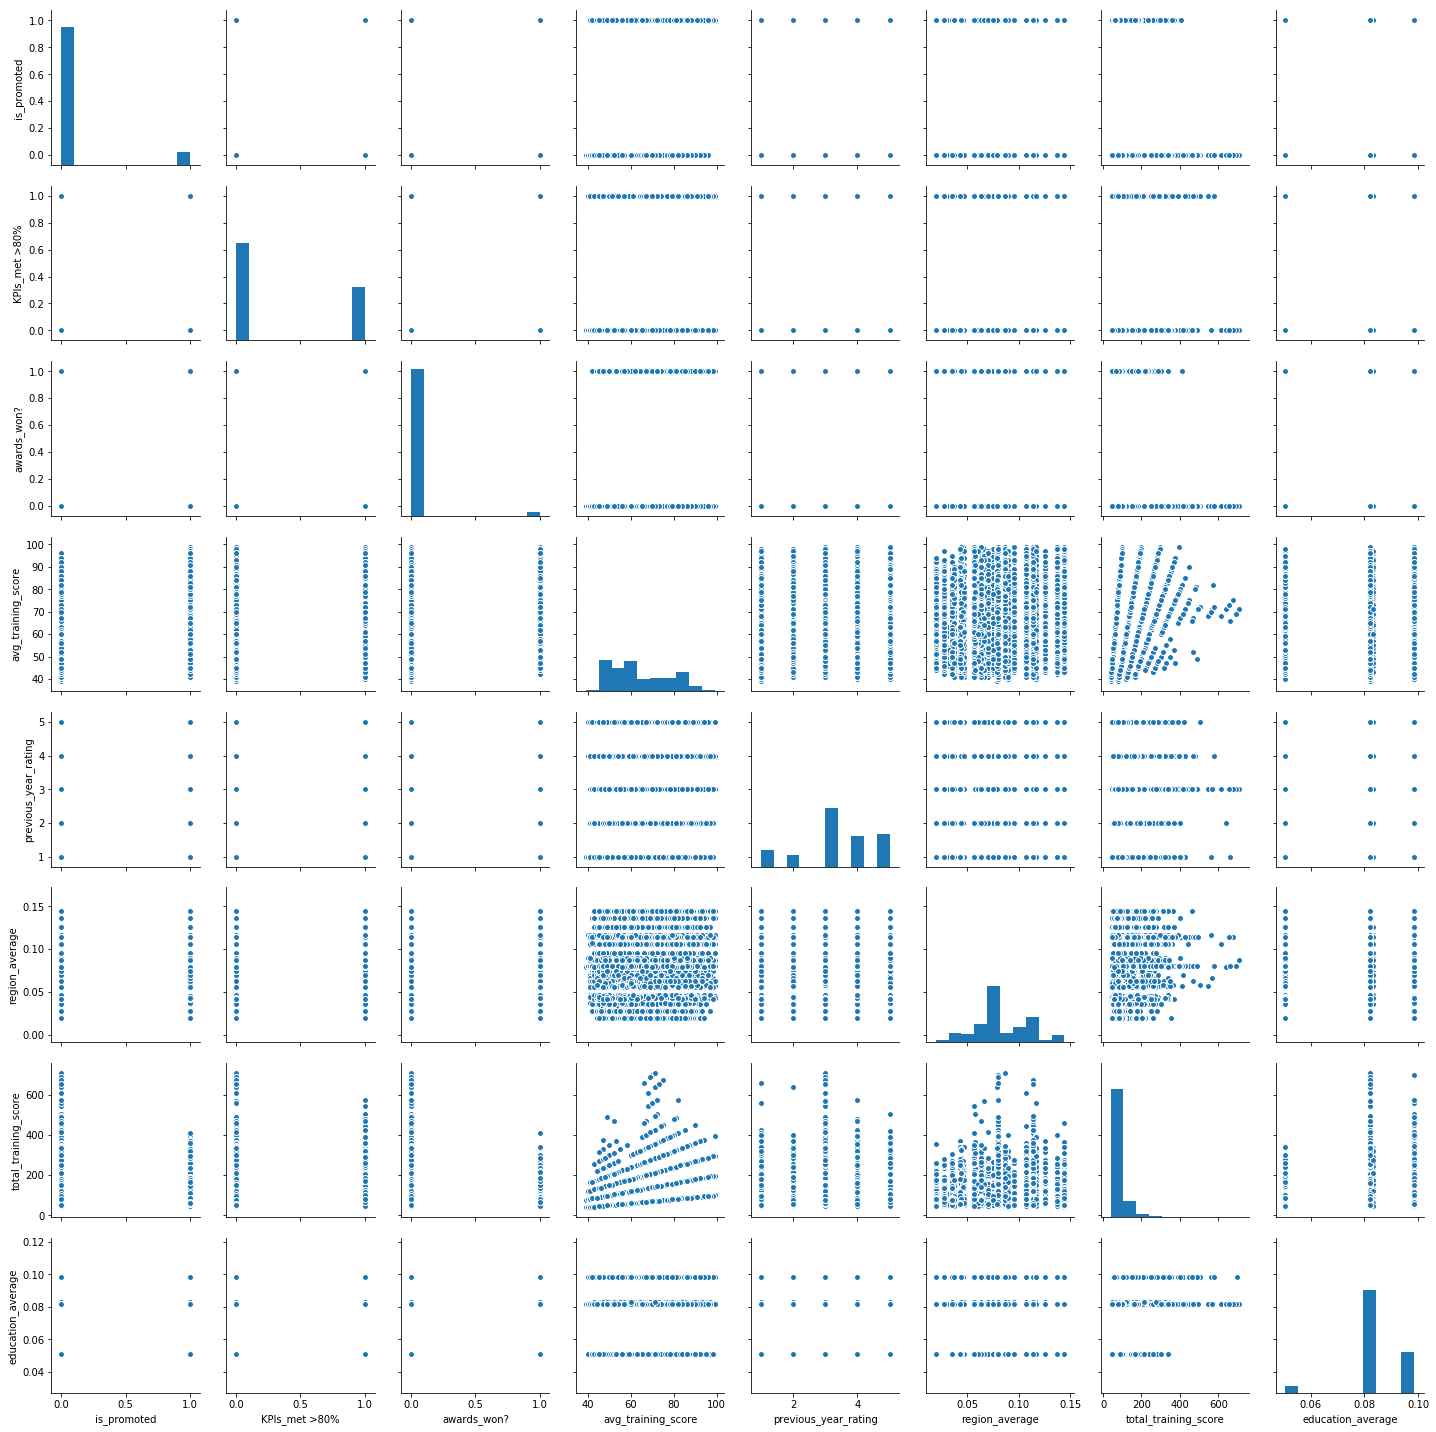

In [54]:
sns.pairplot(train_dataset, palette="husl", vars = ['is_promoted', 'KPIs_met >80%', 'awards_won?', 'avg_training_score',
       'previous_year_rating', 'region_average', 'total_training_score', 'education_average'])

plt.show()

In [59]:
# Convert all categorical variables into dummy variables. Education field should be imputed with 0,1,2 values since 
#higher qualification holds higher weitage
#train_dataset['education'].replace({'Not Known': 0, 'Below Secondary': 1, 'Bachelor\'s': 2, 'Master\'s & above': 3}, inplace = True)
#test_dataset['education'].replace({'Not Known': 0, 'Below Secondary': 1, 'Bachelor\'s': 2, 'Master\'s & above': 3}, inplace = True)

train_data_without_id = train_dataset.drop('employee_id', axis = 1)
col_str = train_data_without_id.columns[train_data_without_id.dtypes == object ]
train_dataset = pd.get_dummies(train_dataset, columns = col_str, drop_first = True)

test_data_without_id = test_dataset.drop('employee_id', axis = 1)
col_str = test_data_without_id.columns[test_data_without_id.dtypes == object ]
test_dataset = pd.get_dummies(test_dataset, columns = col_str, drop_first = True)

train_dataset.head()

,employee_id,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,total_training_score,no_of_trainings_per_year_of_service,...,education_Below Secondary,education_Master's & above,education_Not Known,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,age_bin_31-40,age_bin_41-50,age_bin_51-60,age_bin_nan
0,65438,35,5.0,8,1,0,49,0,49,0.125000,...,0,1,0,0,0,1,1,0,0,0
1,65141,30,5.0,4,0,0,60,0,60,0.250000,...,0,0,0,1,0,0,0,0,0,0
2,7513,34,3.0,7,0,0,50,0,50,0.142857,...,0,0,0,1,0,1,1,0,0,0
3,2542,39,1.0,10,0,0,50,0,100,0.200000,...,0,0,0,1,0,0,1,0,0,0
4,48945,45,3.0,2,0,0,73,0,73,0.500000,...,0,0,0,1,0,0,0,1,0,0


In [54]:
# Output the Dataframe into a CSV file
train_dataset.to_csv('dataset/train_EDA.csv',  index = False)
test_dataset.to_csv('dataset/test_EDA.csv',  index = False)